In [1]:
# math 
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn

# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# for choosing covariates to include in model
from patsy import dmatrices 

# model selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


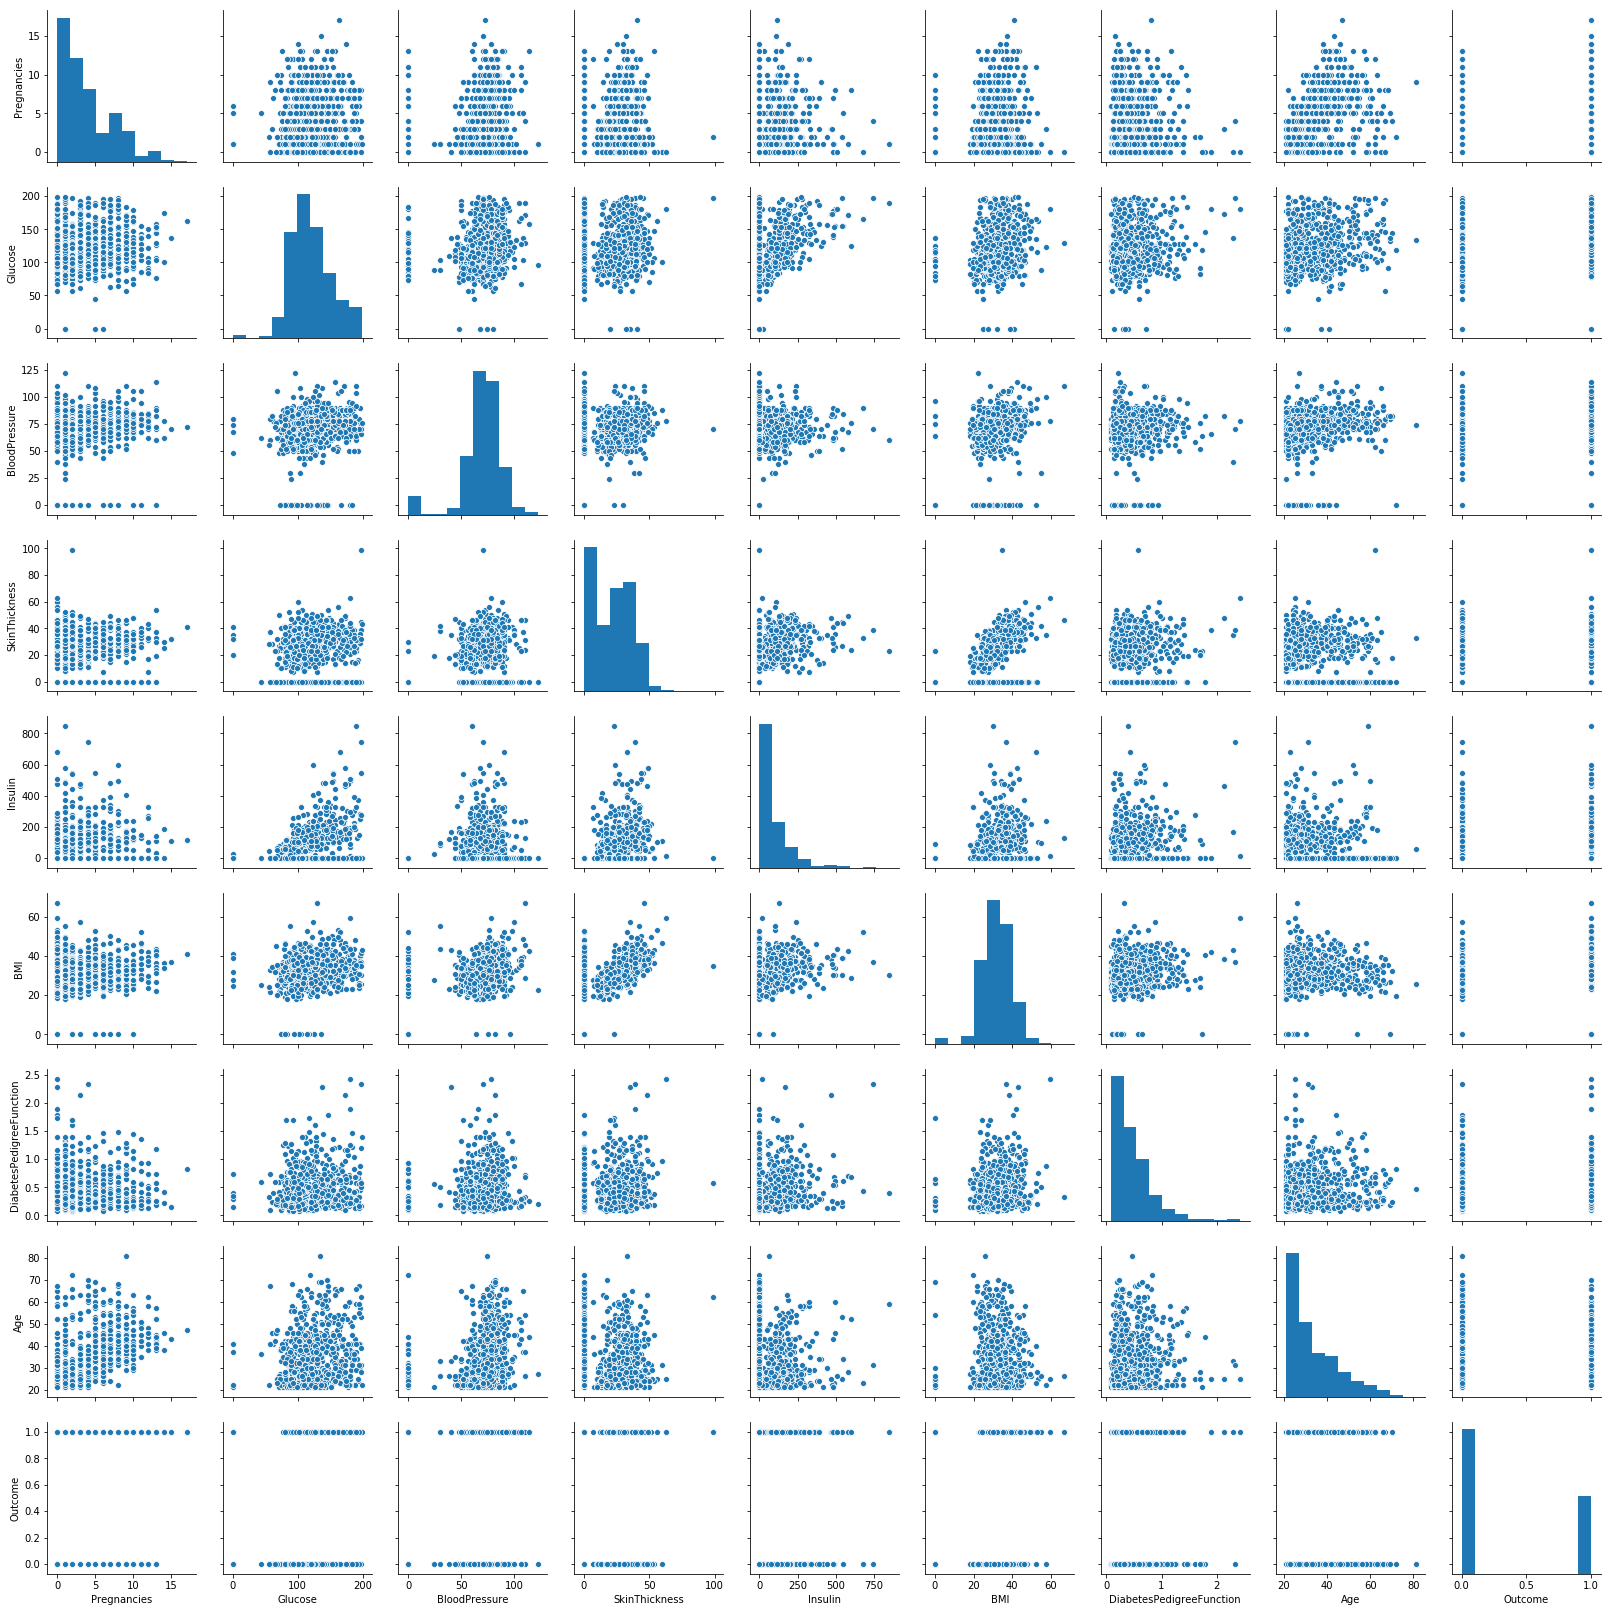

In [3]:
seaborn.pairplot(diabetes)

In [4]:
y = diabetes['Outcome']
features = diabetes.columns[:-1]
X = diabetes[features]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
model = sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 17 Apr 2020   Pseudo R-squ.:                 0.05922
Time:                        15:46:26   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

## model selection on training set, then model fit on test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [7]:
def minAIC(X,y):
    variables = X.columns
    model = sm.Logit(y,X[variables]).fit()
    while True:
        maxp = np.max(model.pvalues)
        newvariables = variables[model.pvalues < maxp]
        newmodel = sm.Logit(y,X[variables]).fit()
        if newmodel.aic < model.aic:
            model = newmodel
            variables = newvariables
        else:
            break
    return model,variables

In [8]:
# select on training set, fit on test set 
model,variables = minAIC(X_train, y_train)
model = sm.Logit(y_test,X_test[variables]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.625281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586818
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  384
Model:                          Logit   Df Residuals:                      376
Method:                           MLE   Df Model:                            7
Date:                Fri, 17 Apr 2020   Pseudo R-squ.:                 0.08566
Time:                        15:46:26   Log-Likelihood:                -225.34
converged:                       True   LL-Null:                       -246.45
                                        LLR p-value:                 4.716e-07
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1572      0.043      3.695      0.000       0.074       0.241
Glucose                      0.0150      0.004      3.842      0.000       0.007       0.023
BloodPressure               -0.0335      0.007     -5.067      0.000      -0.047      -0.021
SkinThickness                0.0010      0.008      0.119      0.905      -0.016       0.018
Insulin                      0.0012      0.001      1.007      0.314      -0.001       0.004
BMI                         -0.0089      0.015     -0.588      0.556      -0.039       0.021
DiabetesPedigreeFunction     0.1168      0.356      0.329      0.742      -0.580       0.814
Age                         -0.0174      0.013     -1.382      0.167      -0.042       0.007
============================================================================================
"""

In [9]:
ingot = pd.read_csv('ingots.csv')
# NR means not ready
ingot = ingot.head(15)

In [10]:
ingot['failure'] = ingot['NR']
ingot['success'] = ingot['n'] - ingot['NR']

In [11]:
y = ingot[['success', 'failure']]
X = ingot[['heat', 'soak']]

In [12]:
model = sm.GLM(y, X, family=sm.families.Binomial(), intercept=True).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                    
==================================================================================
Dep. Variable:     ['success', 'failure']   No. Observations:                   15
Model:                                GLM   Df Residuals:                       13
Model Family:                    Binomial   Df Model:                            1
Link Function:                      logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -23.336
Date:                    Fri, 17 Apr 2020   Deviance:                       34.281
Time:                            15:46:27   Pearson chi2:                     45.8
No. Iterations:                         7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
heat           0.0017      0.019      0.092      0.927      -0.035       0.038
soak           2.1039      0.371      5.665      0.000       1.376       2.832
==============================================================================
"""